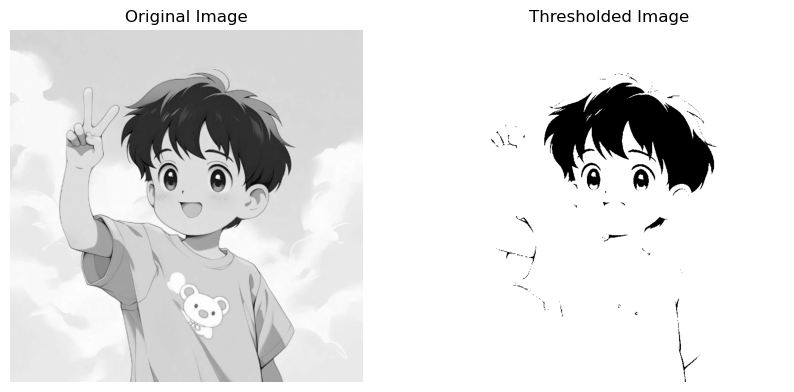

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_path = 'boy.jpeg'  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    threshold_value = 100
    thresholded_image = (image > threshold_value) * 255
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off') 
    plt.subplot(1, 2, 2)
    plt.imshow(thresholded_image.astype(np.uint8), cmap='gray')
    plt.title('Thresholded Image')
    plt.axis('off') 
    plt.show()


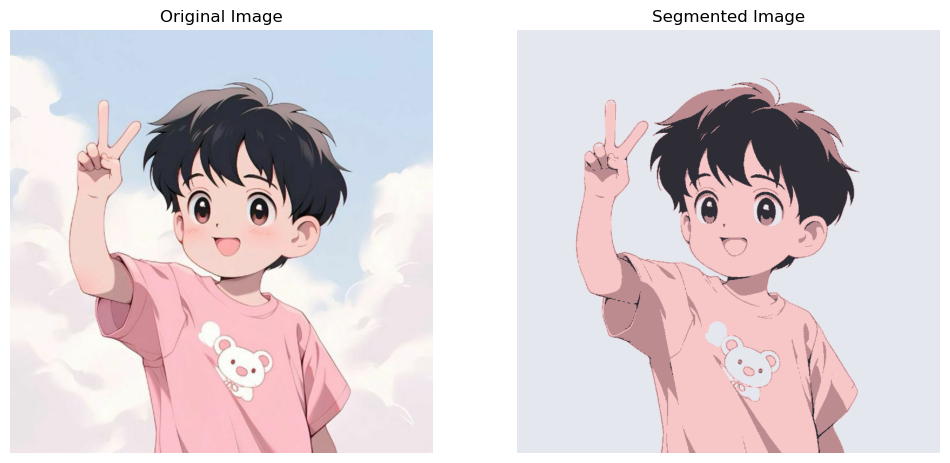

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('boy.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = image_rgb.reshape((-1, 3))

k = 4
max_iters = 100
tolerance = 1e-4

np.random.seed(42)
centroids = pixels[np.random.choice(pixels.shape[0], k, replace=False)]

for _ in range(max_iters):
    labels = np.argmin(np.linalg.norm(pixels[:, None] - centroids, axis=2), axis=1)
    new_centroids = np.array([pixels[labels == i].mean(axis=0) for i in range(k)])

    if np.linalg.norm(new_centroids - centroids) < tolerance:
        break

    centroids = new_centroids

segmented_image = new_centroids[labels].reshape(image_rgb.shape).astype(np.uint8)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.axis('off')
plt.show()

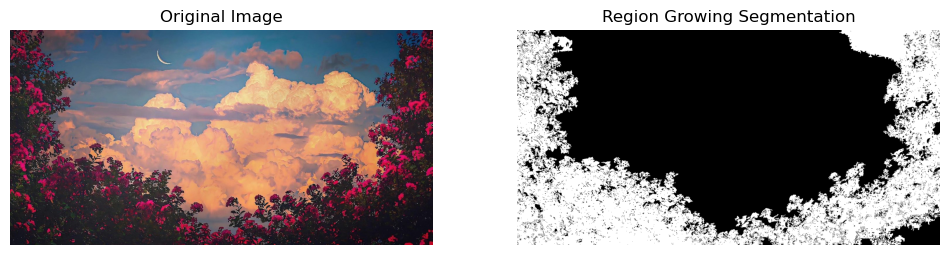

In [3]:
image = cv2.imread('clouds.jpeg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

threshold = 30  
seed = (100, 100) 
height, width = gray_image.shape

region_mask = np.zeros_like(gray_image, dtype=np.uint8)

def is_valid(x, y):
    return 0 <= x < width and 0 <= y < height

def get_neighbors(x, y):
    neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
    return [(nx, ny) for nx, ny in neighbors if is_valid(nx, ny)]

def region_growing(seed, threshold):
    region_mask[seed] = 255 
    region_intensity = gray_image[seed]  
    region_points = [seed]  
    while region_points:
        x, y = region_points.pop() 
        for nx, ny in get_neighbors(x, y):
            if region_mask[ny, nx] == 0: 
                if abs(int(gray_image[ny, nx]) - int(region_intensity)) < threshold: 
                    region_mask[ny, nx] = 255  
                    region_points.append((nx, ny))  
    return region_mask

region = region_growing(seed, threshold)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(region, cmap='gray')
plt.title('Region Growing Segmentation')
plt.axis('off')
plt.show()


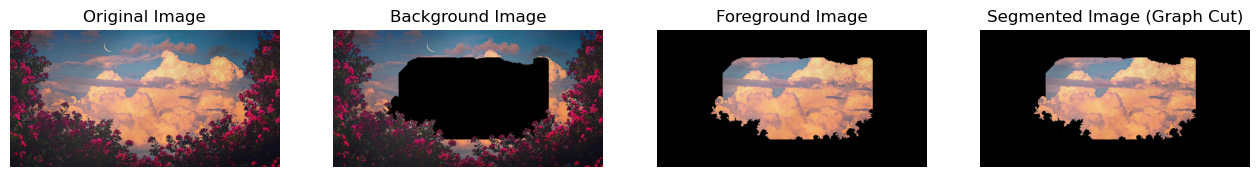

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "clouds.jpeg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = np.zeros(image.shape[:2], np.uint8)

bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

height, width = image.shape[:2]
rect = (int(width * 0.2), int(height * 0.2), int(width * 0.6), int(height * 0.6))

cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

mask_final = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")

foreground = image * mask_final[:, :, np.newaxis]
background = image.copy()
background[mask_final == 1] = [0, 0, 0]

segmented_image = cv2.bitwise_and(image, image, mask=mask_final)

fig, axes = plt.subplots(1, 4, figsize=(16, 6))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(background)
axes[1].set_title("Background Image")
axes[1].axis("off")

axes[2].imshow(foreground)
axes[2].set_title("Foreground Image")
axes[2].axis("off")

axes[3].imshow(segmented_image)
axes[3].set_title("Segmented Image (Graph Cut)")
axes[3].axis("off")

plt.show()


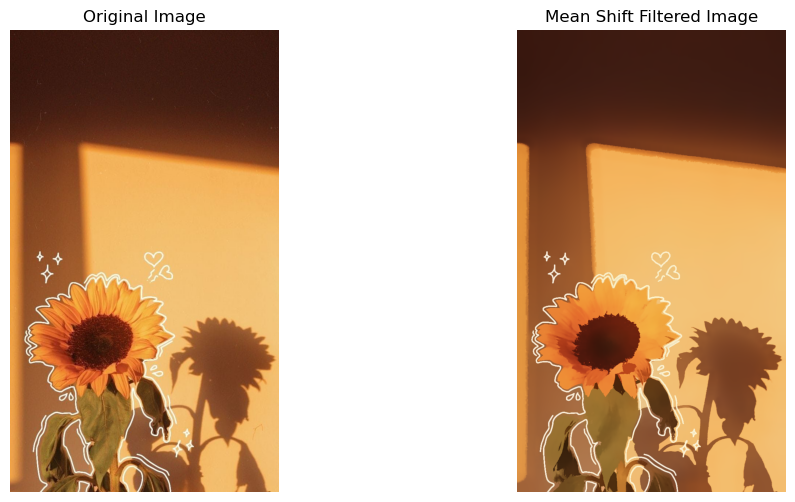

In [5]:
image_path = "sunflower.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

spatial_radius = 20 
color_radius = 40 
filtered_image = cv2.pyrMeanShiftFiltering(image, spatial_radius, color_radius)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(filtered_image)
axes[1].set_title("Mean Shift Filtered Image")
axes[1].axis("off")

plt.show()
